# Abrimos el archivo csv

Se nos proporcionó un conjunto de datos que contiene canciones de Spotify entre los años 1970 y 1980. Para inciar el análisis, procedimos a abrir el archivo en formato CSV.

In [ ]:
import pandas as pd

# abrimos el archivo usando una función específica de pandas
dataset_original = pd.read_csv("covers.csv")

# Exploracion de los datos

#### Comenzamos la exploración de los datos del dataset

In [ ]:
#Creamos una copia para no modificar el dataset original
DataSetCopia = dataset_original.copy()
DataSetCopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             998 non-null    object 
 1   Artist            998 non-null    object 
 2   Duration          998 non-null    object 
 3   Time_Signature    998 non-null    int64  
 4   Danceability      998 non-null    float64
 5   Energy            998 non-null    float64
 6   Key               998 non-null    int64  
 7   Loudness          998 non-null    float64
 8   Mode              998 non-null    int64  
 9   Speechiness       998 non-null    float64
 10  Acousticness      998 non-null    float64
 11  Instrumentalness  998 non-null    float64
 12  Liveness          998 non-null    float64
 13  Valence           998 non-null    float64
 14  Tempo             998 non-null    float64
 15  Popularity        998 non-null    int64  
 16  Year              998 non-null    int64  
dt

#### Vemos los primeros elementos para comprender la estructura de los datos

In [114]:
DataSetCopia.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Babe,Styx,3:38,4,0.700,0.582,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,96,1980
1,The Rose,Bette Midler,4:04,4,0.264,0.640,8,-6.221,1,0.0442,0.03930,0.000002,0.1510,0.190,84.828,92,1980
2,Cars,Gary Numan,4:08,4,0.338,0.562,9,-7.181,1,0.0290,0.03900,0.000000,0.1070,0.259,149.907,82,1980
3,Magic,Olivia Newton-John,2:17,4,0.911,0.689,1,-6.176,1,0.2650,0.00119,0.000000,0.0704,0.546,140.034,80,1980
4,We Don’t Talk Anymore,Cliff Richard,3:37,4,0.728,0.563,1,-8.053,0,0.1340,0.62100,0.000000,0.1790,0.352,100.017,80,1980


## Realizamos un resumen estadístico
El resumen nos pertmitirá detallar las métricas para cada columna y obtener una visión general de los datos.

In [115]:
DataSetCopia.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,3.966934,0.626469,0.633362,5.225451,-8.886123,0.689379,0.05763,0.244627,0.042554,0.178618,0.603099,120.904174,57.743487,1984.498998
std,0.228178,0.151517,0.203787,3.657376,3.829896,0.462980,0.05574,0.248634,0.157057,0.162648,0.257874,26.254971,17.397193,2.873372
min,1.000000,0.174000,0.018300,0.000000,-28.980000,0.000000,0.02270,0.000003,0.000000,0.022300,0.028700,61.530000,0.000000,1980.000000
25%,4.000000,0.534000,0.489000,2.000000,-11.256000,0.000000,0.03170,0.043350,0.000000,0.083950,0.388000,102.303000,49.000000,1982.000000
50%,4.000000,0.633000,0.651500,5.000000,-8.270000,1.000000,0.03935,0.155000,0.000022,0.113500,0.644000,119.969000,60.000000,1984.500000
75%,4.000000,0.735000,0.797000,9.000000,-6.045000,1.000000,0.05645,0.387250,0.001448,0.225750,0.824750,135.000750,70.000000,1987.000000
max,5.000000,0.988000,0.994000,11.000000,-1.496000,1.000000,0.52400,0.996000,0.974000,0.981000,0.984000,208.571000,96.000000,1989.000000


Nos llamo la atención que la variable loudness tenga valores negativos por lo que luego de investigar, vimos que los valores negativos son comunes en la representacion de decibeles para las canciones.

# Limpieza y preprocesamiento de datos

## Busqueda de valores nulos

In [ ]:
# Buscamos los valores nulos con la funcion isna
print(DataSetCopia.isna().sum())


Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64


Por el momento pareciera que no hay elementos nulos porque no tenemos ningun valor con un nan

Posteriormente analizamos la existencia de ceros para las variables numéricas, no encontramos ningun potencial nulo pero encontramos dos columnas con valores a analizar.

In [117]:
DataSetCopia["Popularity"].value_counts().sort_index()

Popularity
0     12
1      3
3      2
4      2
5      1
      ..
90     1
91     2
92     2
93     1
96     1
Name: count, Length: 90, dtype: int64

Tenemos 12 canciones que tiene popularidad 0, esto podría representar varias cosas, pero al ser 12 de 998 filas que tenemos y al no saber como se mide esta variable, asumimos que el 0 es un valor posible para esta columna; Podría representar el grado de popularidad más bajo.

In [118]:
DataSetCopia["Instrumentalness"].value_counts().sort_index()

Instrumentalness
0.000000    307
0.000001      1
0.000001      2
0.000001      1
0.000001      1
           ... 
0.931000      1
0.939000      1
0.953000      1
0.964000      1
0.974000      1
Name: count, Length: 605, dtype: int64

Con la Columna 'instrumentalness' encontramos muchas filas que tienen un 0, sin embargo consideramos que no se trata de valores nulos, si no que puede tratarse de canciones cantadas acapella

Ahora vamos a buscar elementos que potencialmente representan un nulo en las columnas track y artist

In [ ]:
#Contamos
DataSetCopia["Track"].value_counts()
#for idx, val in DataSetCopia["Track"].value_counts().items():
  #print(idx, val)
  

Track
Waiting For A Girl Like You              2
Physical                                 2
Always On My Mind                        2
Magic                                    2
Say Say Say                              2
                                        ..
When I Looked At Him                     1
I Remember Holding You                   1
Don’t Rush Me                            1
I’ll Be Loving You (FOREVER)             1
Baby, I Love Your Way/Freebird Medley    1
Name: count, Length: 972, dtype: int64

In [120]:
for idx, val in DataSetCopia["Artist"].value_counts().items():
  print(idx, val)

Madonna 17
Daryl Hall & John Oates 13
Michael Jackson 13
Lionel Richie 12
Prince 11
Huey Lewis and the News 9
Stevie Wonder 9
Bruce Springsteen 9
Elton John 9
Billy Joel 9
Duran Duran 8
Whitney Houston 8
Air Supply 8
Phil Collins 8
Kool & the Gang 8
Foreigner 7
Bon Jovi 7
Billy Ocean 7
Kenny Loggins 7
The Pointer Sisters 7
Kenny Rogers 7
Sheena Easton 7
George Michael 6
Diana Ross 6
Culture Club 6
Exposé 6
The Police 6
Genesis 6
Olivia Newton-John 6
Chicago 6
Cyndi Lauper 6
John Cougar Mellencamp 6
Rod Stewart 6
Janet Jackson 6
Bobby Brown 6
Styx 5
INXS 5
Steve Winwood 5
Little River Band 5
Richard Marx 5
The Bangles 5
Van Halen 5
Debbie Gibson 5
The Cars 5
Donna Summer 5
Journey 5
Rick Springfield 5
Neil Diamond 5
New Kids on the Block 5
Bryan Adams 5
Laura Branigan 5
Juice Newton 5
Tina Turner 5
Dan Fogelberg 5
Heart 5
Christopher Cross 5
The Jets 5
Commodores 4
Fleetwood Mac 4
REO Speedwagon 4
Taylor Dayne 4
Wham! 4
Gloria Estefan and Miami Sound Machine 4
Don Henley 4
Paul McCartne

Pudimos notar que tanto en la columna "Track" como en "Artist" no encontramos nulos ni valores que representen valores nulos.

## Creación una nueva columna a partir de otras

Decidimos agregar una columna "Feat" para indicar que es una colaboración y de esta manera poder obtener algo de informacion de la columna artist.

In [121]:
columnaArtistas = DataSetCopia['Artist']
artistasUnicos = columnaArtistas.unique()
print(artistasUnicos)

['Styx' 'Bette Midler' 'Gary Numan' 'Olivia Newton-John' 'Cliff Richard'
 'Andy Gibb' 'Doobie Brothers' 'Michael Jackson' 'Fleetwood Mac'
 'Diana Ross' 'Rupert Holmes' 'Kenny Rogers' 'Billy Joel' 'Donna Summer'
 'Commodores' 'Queen' 'Dan Fogelberg' 'KC and the Sunshine Band'
 'Air Supply' 'Blondie' 'Anne Murray' 'Smokey Robinson' 'Kim Carnes'
 'Kenny Loggins' 'Barbra Streisand' 'Bob Seger and the Silver Bullet Band'
 'Christopher Cross' 'Ambrosia' 'Captain & Tennille' 'Eagles'
 'Linda Ronstadt' 'Jefferson Starship' 'The Manhattans'
 'Tom Petty and the Heartbreakers' 'George Benson' 'Irene Cara'
 'Paul McCartney' 'Lipps Inc' 'Kool & the Gang' 'Stevie Wonder'
 'The Brothers Johnson' 'Pete Townshend' 'Carole King' 'Robbie Dupree'
 'Little River Band' 'Benny Mardones' 'Eddie Rabbitt' 'Foreigner' 'Prince'
 'Johnny Lee' 'Paul Simon' 'Elton John' 'Dr. Hook' 'Teri DeSario & KC'
 'The Rolling Stones' 'the Pointer Sisters' 'Shalamar' 'The Spinners'
 'Olivia Newton-John / Electric Light Orchestra

In [ ]:
#Con los datos de arriba pudimos ver los caracteres que se usan para separar a los artistas
DataSetCopia['Featuring'] = DataSetCopia['Artist'].apply(lambda x: (" and " in x) or (" & " in x) or ("/" in x) or (", " in x) or (" with " in x))

In [123]:
#Aca podemos ver un ejemplo de una colaboracion y como en la columna 'featuring' hay un true
fila = DataSetCopia.loc[DataSetCopia['Artist'] == 'KC and the Sunshine Band']
print(fila)

              Track                    Artist Duration  Time_Signature  \
18  Please Don’t Go  KC and the Sunshine Band     3:01               4   

    Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
18         0.683   0.554    6    -7.487     0         0.05         0.379   

    Instrumentalness  Liveness  Valence   Tempo  Popularity  Year  Featuring  
18           0.00011    0.0845    0.452  85.455          74  1980       True  


## Tratamiento de la columna Duration

En el caso de la columna "Duration" nos encontramos con valores del tipo String, que deberían ser tratados como valores Ordinales. Para esto, reemplazamos el tiempo que se encuentra representado por minutos:segundos, a segundos.

In [124]:
def duration_to_seconds(duration):
    minutes, seconds = map(int, duration.split(':'))
    return minutes * 60 + seconds

DataSetCopia['Duration_seconds'] = DataSetCopia['Duration'].apply(duration_to_seconds)

#Borrar duracion
DataSetCopia = DataSetCopia.drop('Duration', axis = 1)

DataSetCopia['Featuring'].value_counts()

Featuring
False    888
True     110
Name: count, dtype: int64

## Busqueda elementos repetidos

In [125]:
print(DataSetCopia.duplicated().sum())
duplicados = DataSetCopia[DataSetCopia.duplicated()]
duplicados

1


,Track,Artist,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Featuring,Duration_seconds
589,Sugar Walls,Sheena Easton,4,0.634,0.526,1,-10.281,0,0.0531,0.612,0.0102,0.127,0.729,86.78,43,1985,False,123


Aca encontramos que hay una única fila repetida, la cual es la de la canción Sugar Walls. Por lo tanto una de estas filas tiene que ser eliminada ya que no nos brinda informacion necesaria.

In [126]:
DataSetCopia[DataSetCopia.duplicated(keep=False)]

# eliminamos los duplicados
DataSetCopia.drop_duplicates(keep="first", inplace=True)
# contamos la cantidad de duplicados
print(DataSetCopia.duplicated().sum())

0


Ahora vamos a ver las canciones que tengan el mismo nombre y artista, ya que podrian representar canciones que esten repetidas

In [127]:
duplicados = DataSetCopia[DataSetCopia.duplicated(subset=['Track', 'Artist'], keep=False)]
duplicados.sort_values(by= ['Danceability'])

,Track,Artist,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Featuring,Duration_seconds
125,Waiting For A Girl Like You,Foreigner,4,0.330,0.469,10,-9.286,0,0.0335,0.3100,0.000002,0.0402,0.433,201.327,71,1981,False,292
223,Waiting For A Girl Like You,Foreigner,4,0.330,0.469,10,-9.286,0,0.0335,0.3100,0.000002,0.0402,0.433,201.327,71,1982,False,292
114,Lady,Kenny Rogers,4,0.539,0.160,3,-13.285,1,0.0329,0.8810,0.000268,0.1050,0.322,81.446,76,1981,False,183
12,Lady,Kenny Rogers,4,0.539,0.160,3,-13.285,1,0.0329,0.8810,0.000268,0.1050,0.322,81.446,76,1980,False,183
208,Physical,Olivia Newton-John,4,0.647,0.844,0,-3.756,1,0.0457,0.0137,0.000658,0.1020,0.746,146.967,78,1982,False,193
113,Physical,Olivia Newton-John,4,0.647,0.844,0,-3.756,1,0.0457,0.0137,0.000658,0.1020,0.746,146.967,78,1981,False,193
451,I Feel For You,Chaka Khan,4,0.698,0.912,11,-8.993,1,0.0675,0.0145,0.022500,0.2790,0.797,124.917,59,1984,False,343
553,I Feel For You,Chaka Khan,4,0.698,0.912,11,-8.993,1,0.0675,0.0145,0.022500,0.2790,0.797,124.917,59,1985,False,343
401,Uptown Girl,Billy Joel,4,0.701,0.944,4,-2.986,1,0.0455,0.0755,0.000000,0.6010,0.792,128.993,85,1984,False,197
304,Uptown Girl,Billy Joel,4,0.701,0.944,4,-2.986,1,0.0455,0.0755,0.000000,0.6010,0.792,128.993,85,1983,False,197


En un principio consideramos que las canciones son la misma pero en una especie de remake, pero esta opcion no parece convincente porque todas las demas columnas son iguales. Podríamos suponer que la misma canción se publico dos veces en distintos años, lo cual no representa una informacion importante y podríamos borrar una de estas filas duplicadas

Sin embargo, la cantidad de filas que aparecen duplicadas son pocas en relación a la cantidad total del data set por lo que decidimos no eliminarlas ya que no afectarán en exceso el análisis.

# Análisis del DataSet

## Analisis bivariado

Con los datos debidamente preprocesados, iniciamos el análisis de las correlaciones bivariadas y creamos un profile report para ver la relacion entre las variables.

In [ ]:
import ydata_profiling as ydp

# generamos el reporte
report = ydp.ProfileReport(DataSetCopia)
# lo mostramos interactivo en nuestra notebook
report.to_notebook_iframe()
# pasamos el reporte a un archivo html
report.to_file(output_file="Reporte_Spotify.html")


### Analisis de Correlaciones

Creamos un profile report con la libreria ydata_profiling para tener un pantallazo general de las correlaciones y luego estudairlas en profundidad.

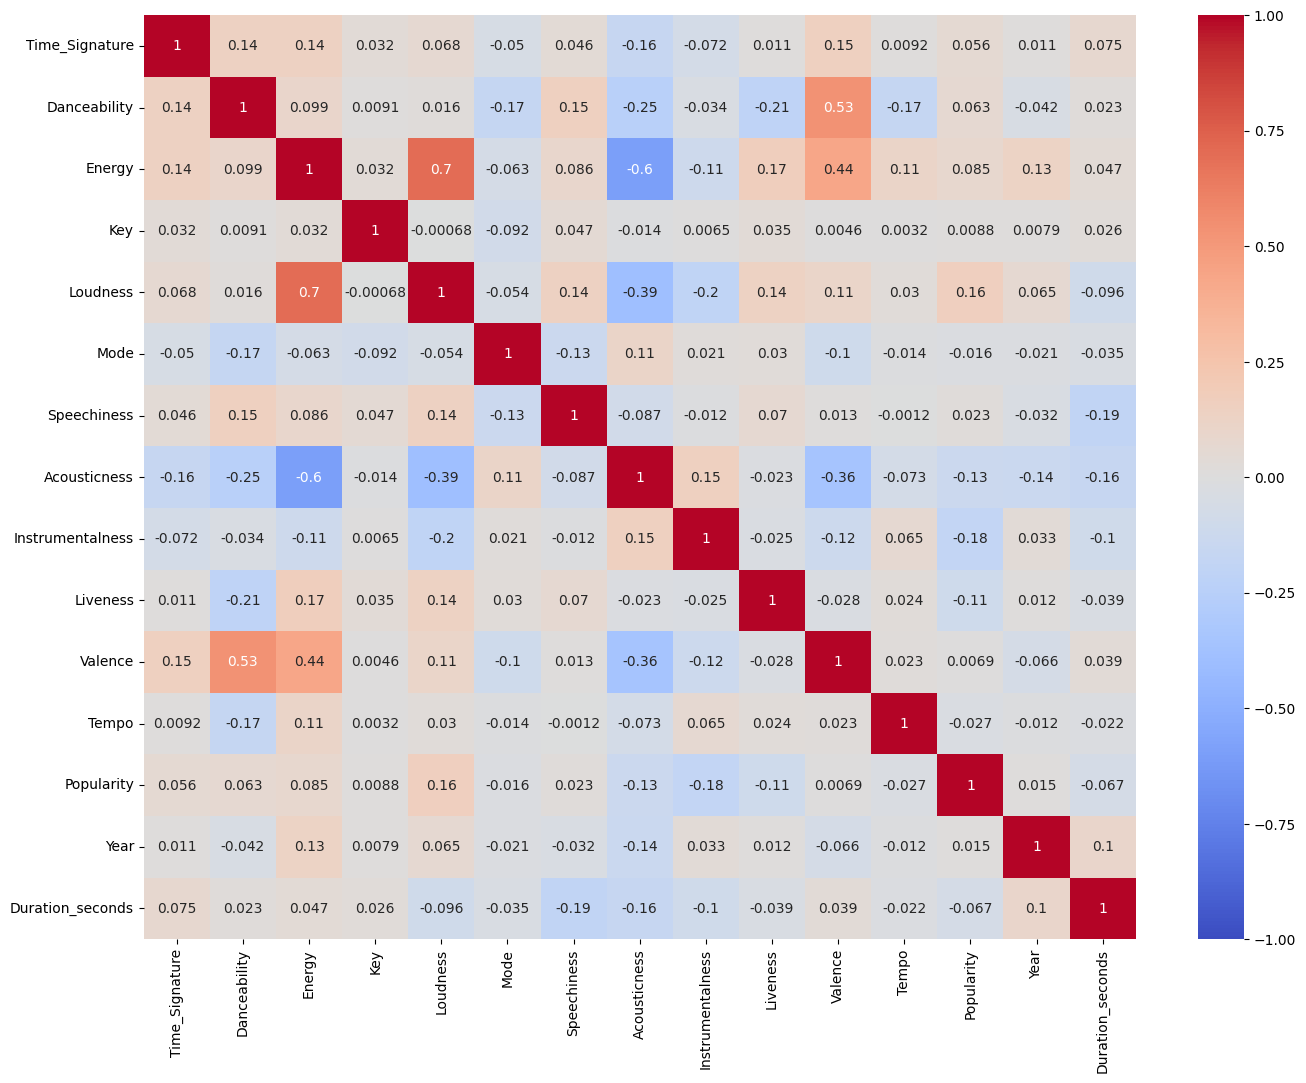

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#creamos una copia con solo los valores numericos del dataset
dataSetNumerico = DataSetCopia
dataSetNumerico = dataSetNumerico.drop(["Track", "Artist", "Featuring"], axis= 1)

#creamos la matriz de correlacion
correlation_matrix = dataSetNumerico.corr()

#habilitamos la visualización de graficos interactivos
%matplotlib inline

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Podemos ver que no hay muchas correlaciones fuertes (mayores a 0,7 o menores a -0,7) por lo que decidimos reducir el umbral a 0,5 al elaborar la matriz que destaca las correlaciones más significativas.

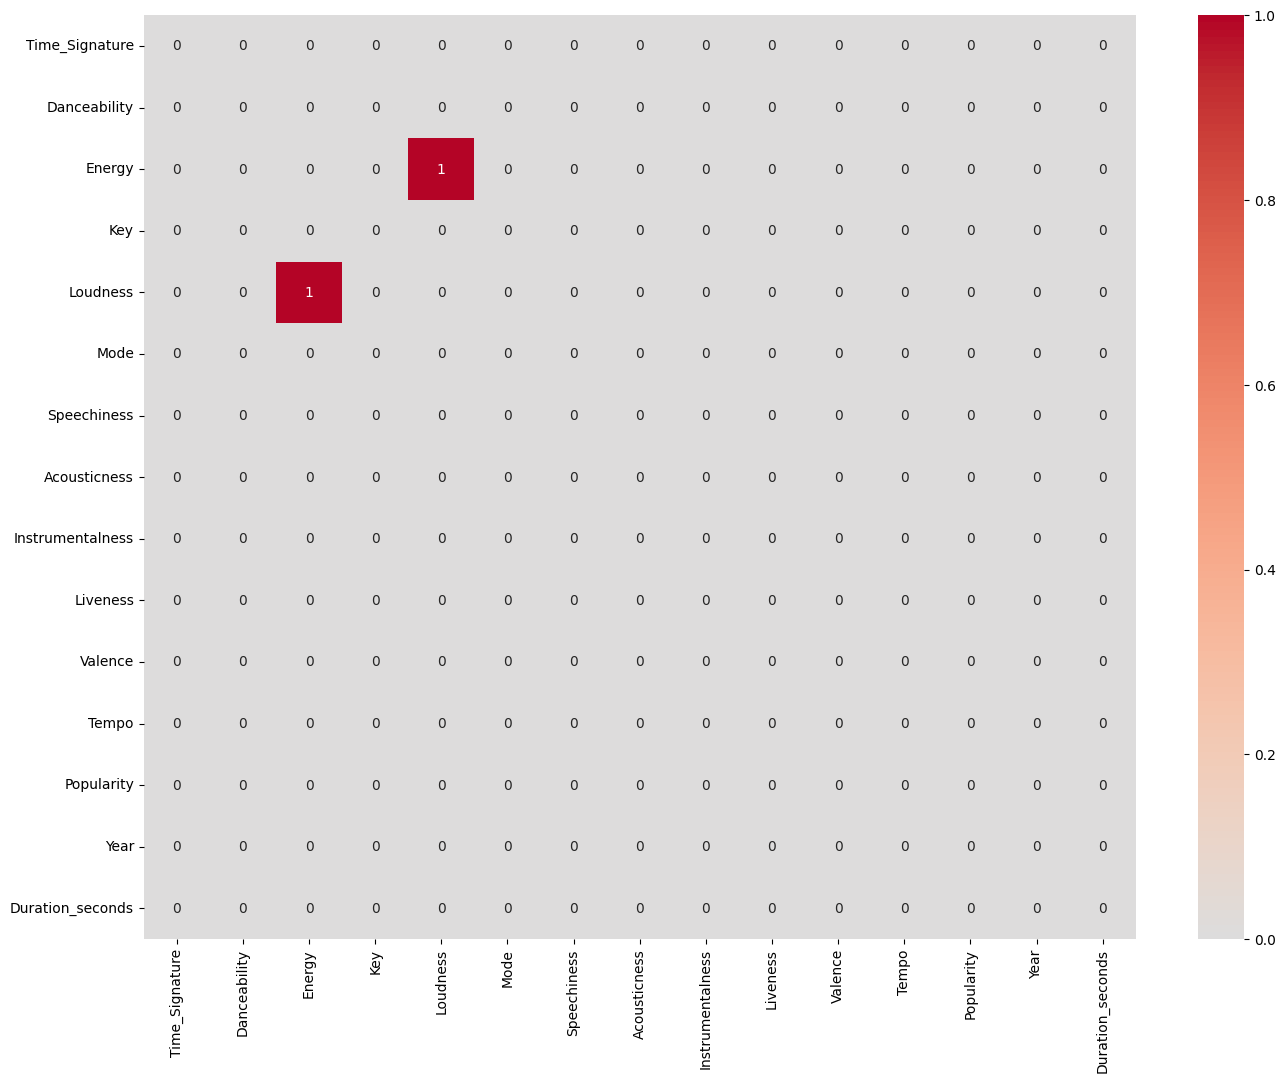

In [ ]:
import numpy as np

# tomamos el valor absoluto de las correlaciones, umbralizamos las mayores a 0.7
correlation_matrix_umbralizada = correlation_matrix.abs() >= 0.7
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

### Vamos a mirar mas de cerca las variables con correlacion alta para ver como se comportan

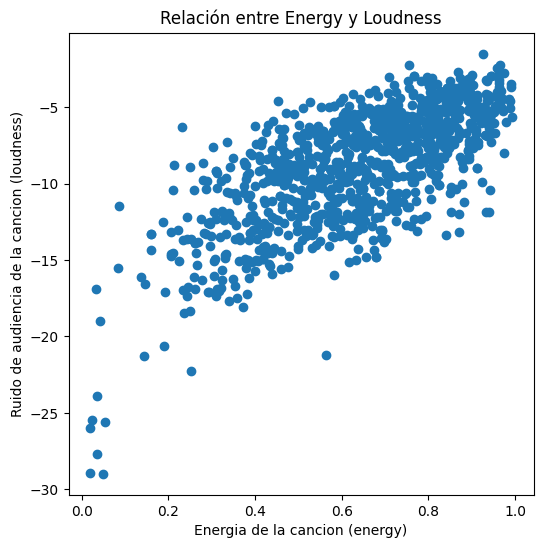

In [ ]:
plt.figure(figsize=(6, 6))  
plt.scatter(DataSetCopia["Energy"], DataSetCopia["Loudness"])

# Agregar etiquetas a los ejes
plt.xlabel("Energia de la cancion (energy)")
plt.ylabel("Ruido de audiencia de la cancion (loudness)")

# Agregar un título al gráfico
plt.title("Relación entre Energy y Loudness")

# Mostrar el gráfico
plt.show()

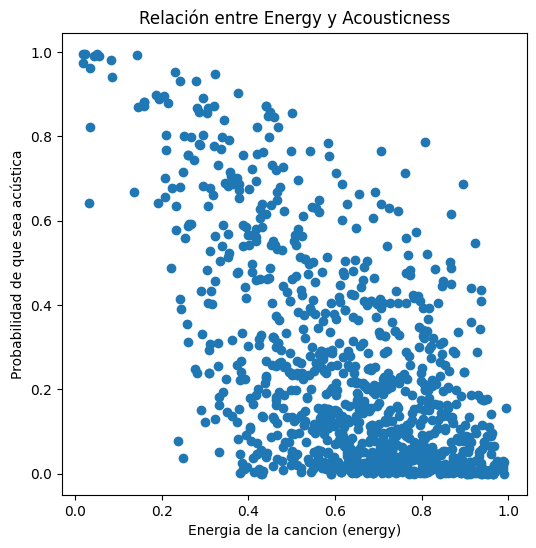

In [132]:
plt.figure(figsize=(6, 6))
plt.scatter(DataSetCopia["Energy"], DataSetCopia["Acousticness"])

plt.xlabel("Energia de la cancion (energy)")
plt.ylabel("Probabilidad de que sea acústica")

plt.title("Relación entre Energy y Acousticness")

plt.show()

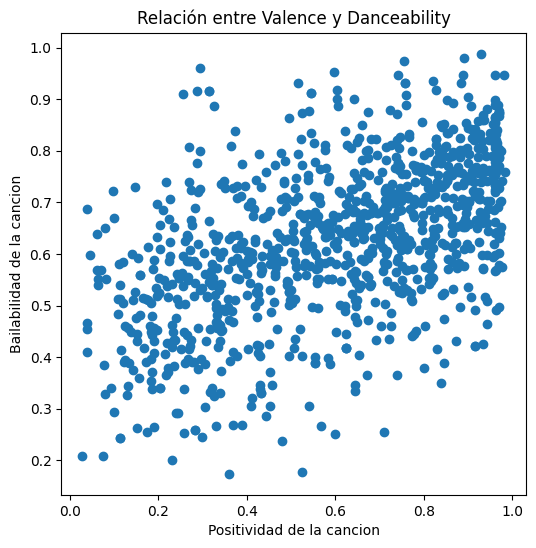

In [133]:
plt.figure(figsize=(6, 6))
plt.scatter(DataSetCopia["Valence"], DataSetCopia["Danceability"])

plt.xlabel("Positividad de la cancion")
plt.ylabel("Bailabilidad de la cancion")

plt.title("Relación entre Valence y Danceability")

plt.show()

Decidimos quedarnos solo con el primer grafico (Energy y Loudness) debido a que es el mas indicado para generar una hipótesis más consistente y descartar los otras dos, ya que, estos tienen datos más dispersos en forma de nube por lo que las hipótesis que podríamos plantear a partir de ellos serían menos confiables.

### Buscamos la relacion entre la popularidad de las canciones y sus características

Creamos un grafico de barras con las canciones mas populares de cada año

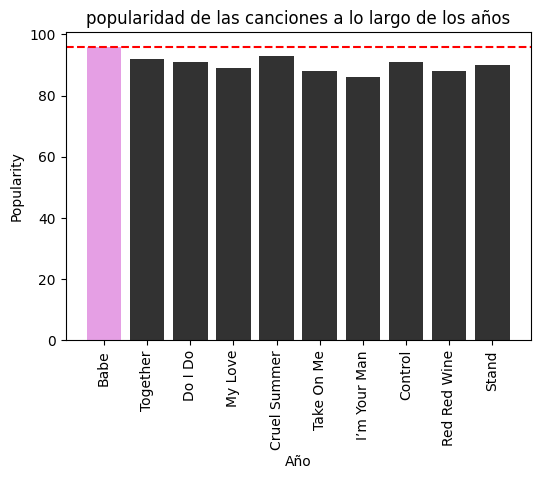

In [134]:
import matplotlib.pyplot as plt

df_highest_popularity = DataSetCopia.loc[DataSetCopia.groupby('Year')['Popularity'].idxmax()]

plt.figure(figsize=(6, 4))

# Crear el gráfico de líneas
colors = ['#E59FE4' if track == "Babe" else '#323232' for track in df_highest_popularity["Track"]]
plt.bar(df_highest_popularity["Track"], df_highest_popularity["Popularity"], color = colors)

# Agregar etiquetas a los ejes
plt.xlabel("Año")
plt.ylabel("Popularity")

# Agregar un título al gráfico
plt.title("popularidad de las canciones a lo largo de los años")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.axhline(y=96, color='red', linestyle='--')

# Mostrar el gráfico
plt.show()

Vemos que la cancion mas popular de la decada es babe

Procedemos a comparar las canciones más populares y menos populares de cada año, para luego analizar los factores que afectan a la popularidad

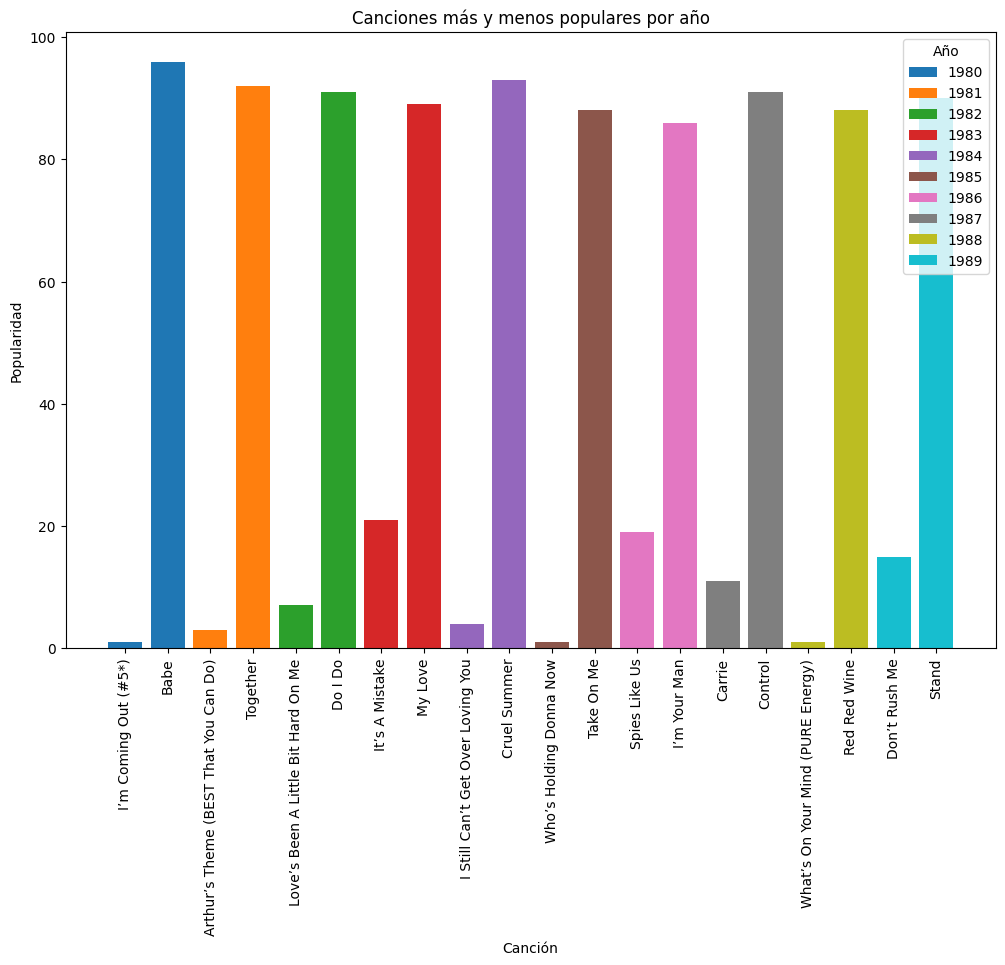

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar las canciones dejando solo las que tienen popularidad mayor que 0
DataSetPopilarityMayorQueCero = DataSetCopia[DataSetCopia['Popularity'] > 0]

# Filtrar las canciones más y menos populares de cada año
top_popularity_per_year = DataSetPopilarityMayorQueCero.loc[DataSetPopilarityMayorQueCero.groupby('Year')['Popularity'].idxmax()]
low_popularity_per_year = DataSetPopilarityMayorQueCero.loc[DataSetPopilarityMayorQueCero.groupby('Year')['Popularity'].idxmin()]

# Concatenar ambas listas de canciones y ordenar por año
merged_data = pd.concat([top_popularity_per_year, low_popularity_per_year]).sort_values('Year').reset_index(drop=True)

merged_data = merged_data.sort_values(by = ["Year", "Popularity"])
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Graficar la popularidad de canciones por año, diferenciando más y menos populares
for year in merged_data['Year'].unique():
    datos_anuales = merged_data[merged_data['Year'] == year]
    plt.bar(datos_anuales['Track'], 
            datos_anuales['Popularity'], label=str(year))

# Etiquetas y título
plt.xlabel("Canción")
plt.ylabel("Popularidad")
plt.title("Canciones más y menos populares por año")
plt.xticks(rotation=90)

# Mostrar leyenda y gráfico
plt.legend(title="Año")
plt.show()

In [136]:
# Busco detalles de las canciones
resultado = DataSetCopia[DataSetCopia['Track'].str.contains("Rush Me")]
resultado

,Track,Artist,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Featuring,Duration_seconds
995,Don’t Rush Me,Taylor Dayne,4,0.686,0.847,7,-7.692,1,0.284,0.445,0.0,0.25,0.748,90.793,15,1989,False,272


#### Analisis de las canciones con mas popularidad a lo largo de los años:

En Resumen: Hay una tendencia de que las canciones mas lentas y romanticas son las mas antiguas y mas cercanas al 1980. Se ve cierto patrón que habla de la popularidad de la musica mas movida a medida que nos alejamos de 1980, esto podria indicar el auge de las canciones movidas y disco tan características de los años 80.


#### Análisis de las canciones menos popoulares a lo largo de los años

En Resumen: Se puede ver una tendencia un poco contraria a las canciones mas populares, hay mucha más presencia de canciones lentas y románticas a lo largo de los años y no tantas canciones tan disco como en el grupo anterior. Además hubo 3 canciones que es muy extraño que estén en este grupo, "I'm Coming Out", "Spies Like Us" y "Carrie" Son canciones muy emblematicas de grupos o artistas muy reconocidos actualmente y tienen una popularidad muy baja, esto podria indicarnos que la variable popularity del data set podría no ser tan representativa o que las mediciones no están hechas bien.

## Analisis Multivariado

### Reducción de Dimensionalidad

Ahora vamos a reducir la dimensionalidad de nuestro dataset para poder ver con mas claridad la relacion que hay entre las canciones mas y menos populares, esto es, los atributos que las diferencian. Para ello vamos a usar el metodo PCA.
Previamente estandarizamos los datos.

In [145]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Borramos variables no numericas y popularity ya que es la que vamos a evaluar
X = DataSetCopia.drop(['Track', 'Artist', 'Featuring', 'Mode', 'Popularity'], axis=1)
# estandarizamos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(np.std(X_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


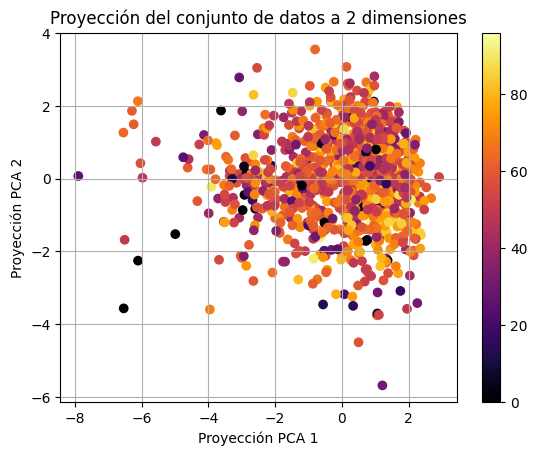

In [146]:
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1], c=DataSetCopia["Popularity"], cmap='inferno')
#plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

En este caso PCA no parece muy efectivo ya que estamos viendo unicamente una nube de puntos y no se puede reconocer ningun patron.
Ahora podemos ver la varianza explicada por estos componentes para ver la proporcion de informacion que se perdió.

In [147]:
pca.explained_variance_ratio_

array([0.20171955, 0.11975961])

Si sumamos ambas dimensiones tenemos que los componentes principales explican al rededor del 32% de la varianza, lo cual es muy poco y tendriamos que aumentar las dimensiones para llegar al 95% donde se pierde muy poca informacion.

#### T-SNE
Probamos T-SNE para ver si logramos disminuir la perdida de informacion.


Before t-SNE: (997, 13)
After t-SNE: (997, 2)


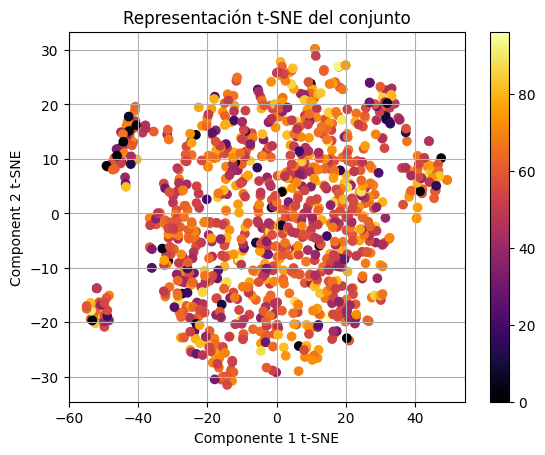

In [ ]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa la popularidad de las canciones
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=DataSetCopia["Popularity"], cmap='inferno')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

#### Probamos tambien con UMAP

Antes de UMAP: (997, 13)
Después de UMAP: (997, 2)


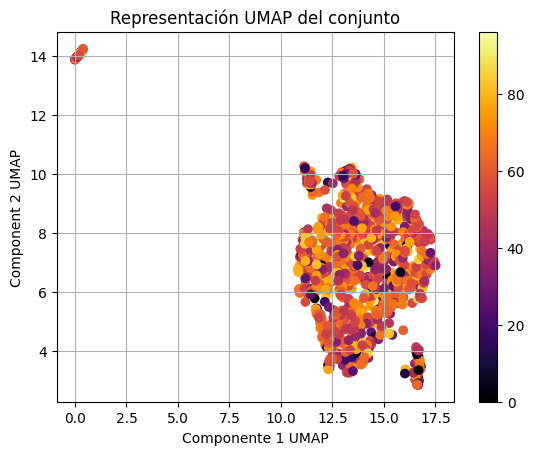

In [ ]:
# importamos umap
import umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_umap = umap.UMAP(n_components=2).fit_transform(X_scaled)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(X_scaled.shape))
print('Después de UMAP: {}'.format(X_umap.shape))

# graficamos los datos, el color de cada punto representa la popularidad de las canciones
plt.scatter(X_umap[:,0], X_umap[:,1], c=DataSetCopia["Popularity"], cmap='inferno')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

Notamos que no existe una separacion clara entre canciones populares y no populares en el espacio reducido, esto sugiere que la popularidad no esta directamente correlacionada con el resto de caracteristicas. Retormaremos esta hipotesis mas tarde.

En el grafico anterior se encuentra una concentracion amplia de puntos en la derecha(por lo visto tambien separada en 3 grupos) y un pequeño grupo en la parte izquierda, estos podrian ser canciones con características inusuales. La popularidad varia dentro de este grupo.

A continuacion, agrupamos los datos por clusters para luego comparar las distribuciones de las diferentes caracteristicas entre cada uno, para explicar la separacion en el espacio. 

### Clustering
Hacemos elbow plt para ver el mejor valor de k

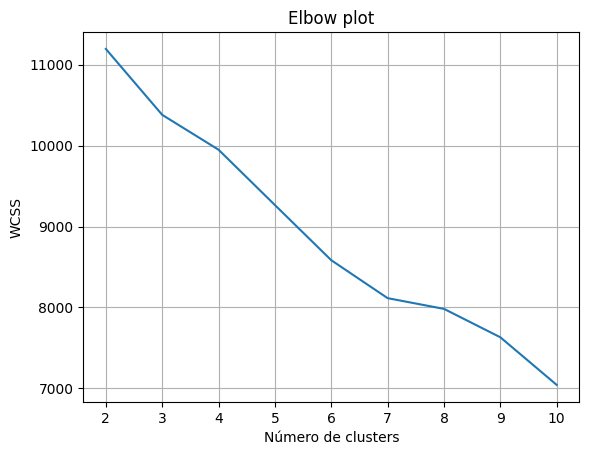

In [150]:
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Podriamos considerar k=3 o k=7

Tomamos k=7

In [174]:
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters = 7, verbose = 0, random_state = 10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(X_scaled)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(X_scaled)
print(clusters_kmeans)

[3 5 2 1 3 2 2 3 2 3 3 1 5 3 3 3 3 3 3 5 3 3 3 4 2 5 3 5 1 5 3 2 3 5 3 3 3
 3 1 3 3 3 3 4 2 3 5 3 6 3 3 3 2 1 3 3 5 2 5 2 3 3 3 3 3 3 5 4 3 3 3 3 3 5
 5 1 3 3 3 3 5 5 2 2 6 2 4 5 3 5 3 3 3 5 3 3 3 4 6 6 3 3 1 3 3 4 4 3 2 1 1
 0 3 2 5 2 3 2 2 1 3 3 3 6 3 2 3 1 3 2 0 2 5 5 5 3 3 3 3 3 4 5 3 5 3 3 3 3
 3 3 3 3 5 5 5 3 3 5 5 2 2 5 3 3 3 3 5 5 5 2 5 5 1 3 3 5 5 3 1 5 3 4 3 3 2
 3 6 5 1 6 5 0 2 2 1 5 3 1 2 5 2 1 2 1 3 2 0 5 2 3 3 3 5 3 5 3 3 3 3 3 0 3
 2 2 3 5 3 3 2 3 3 5 3 3 5 3 5 1 2 3 5 3 2 3 3 6 1 5 5 5 2 2 2 4 5 2 3 5 5
 5 5 2 2 1 1 2 5 2 6 3 3 3 2 2 3 5 3 3 2 5 3 3 0 3 5 5 3 5 3 3 3 3 4 5 1 3
 1 2 5 5 3 3 1 3 1 3 3 5 3 3 2 3 0 5 2 1 0 1 4 0 3 2 2 2 3 1 2 5 2 5 5 2 3
 3 3 5 3 3 2 3 3 5 1 2 0 3 2 0 2 0 5 0 3 0 3 5 1 5 3 3 3 0 1 3 3 3 3 3 3 0
 3 2 0 3 1 3 2 0 3 2 0 3 2 1 0 3 3 2 2 2 0 2 3 0 3 2 5 2 3 2 0 1 2 5 0 3 0
 1 2 5 0 0 0 3 5 3 4 2 3 3 2 5 0 0 1 0 1 2 0 4 0 4 0 1 2 0 0 0 0 3 3 3 0 0
 3 1 3 2 5 5 0 0 6 3 3 3 0 5 4 3 3 0 3 3 5 0 0 0 3 0 0 3 1 3 5 1 4 0 0 0 1
 5 5 5 2 3 1 5 2 3 1 2 2 

In [ ]:
# separamos los nombres de las canciones
Tracks = DataSetCopia['Track']

# Creamos un DataFrame con las canciones y los clusters asignados
cluster_df = pd.DataFrame({'Track': Tracks, 'Cluster': clusters_kmeans})

# Imprimimos las canciones de cada cluster
for cluster_num in range(7):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist())


Cluster 0:
['Start Me Up', 'Take It On The Run', 'Stars On 45 Medley', 'Mirror Mirror', 'Edge Of Seventeen', 'Keep The Fire Burnin’', 'You Can’t Hurry Love', 'Promises, Promises', 'Hungry Like The Wolf', 'Wanna Be Startin’ Somethin’', 'China Girl', 'Dirty Laundry', 'Too Shy', 'Delirious', 'Stand Back', 'She’s A Beauty', 'Twilight Zone', 'Goody Two-Shoes', 'I Know There’s Something Going On', 'Der Kommissar', '(SHE’S) Sexy + 17', 'Is There Something I Should Know?', 'Girls Just Want To Have Fun', 'Borderline', 'Drive', 'Eyes Without A Face', 'Jump', 'Karma Chameleon', 'Owner Of A Lonely Heart', 'Head Over Heels', 'Talking In Your Sleep', 'Round And Round', 'When Doves Cry', 'Wrapped Around Your Finger', 'Ghostbusters', 'Here Comes The Rain Again', 'Lights Out', 'Pink Houses', 'You Might Think', 'Legs', 'Automatic', 'I Feel For You', 'The Reflex', 'Lucky Star', 'I Want A New Drug', 'Infatuation', 'She Bop', 'The Heart Of Rock & Roll', 'Adult Education', 'Miss Me Blind', 'The Glamorous L

Clustering representado en dos dimensiones usando t-sne

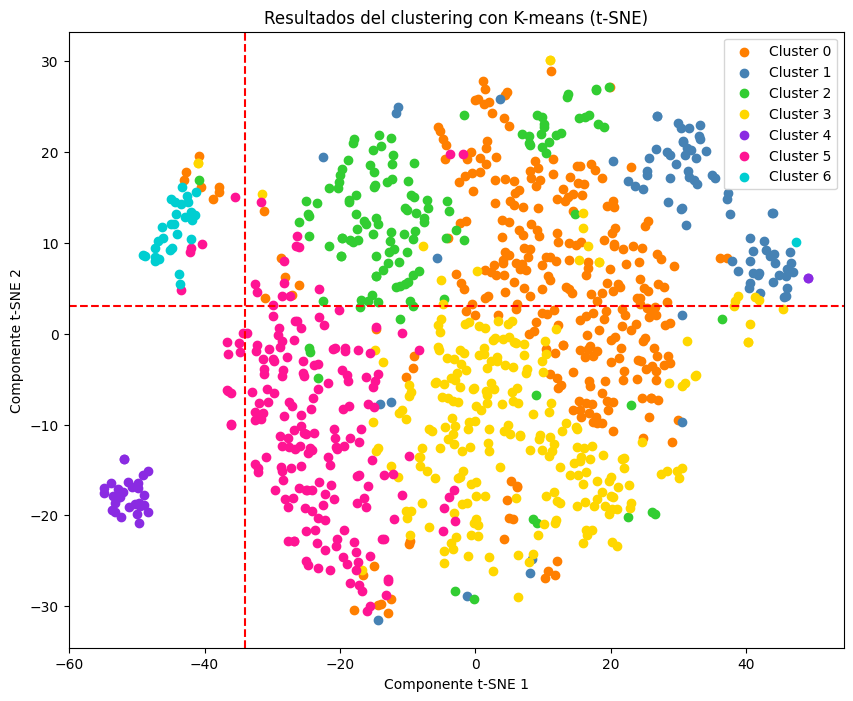

In [238]:
# Crear un DataFrame con los resultados de t-sne y los clusters
tsne_df = pd.DataFrame({'x': X_tsne[:, 0], 'y': X_tsne[:, 1], 'Cluster': clusters_kmeans, 'Track': Tracks})

# Graficar los resultados de t-sne, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(7):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], color=custom_colors[cluster_num % len(custom_colors)], label=f'Cluster {cluster_num}')


plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.axhline(y= 3, color='red', linestyle='--')
plt.axvline(x= -34, color='red', linestyle='--')
plt.show()

Notamos que se forman dos grupos separados del resto de datos, nos resulta interesante analizar el por que de esta separacion. Para esto primero vamos a separar en distintos datasets los datos de cada grupo.

In [ ]:
#Definimos valores minimos y maximos para definir los grupos que son de interes
x_min1, x_max1 = -60 , -40
y_min1, y_max1 = -30 , -10

x_min2, x_max2 = -52 , -34
y_min2, y_max2 = 3 , 21

x_min3, x_max3 = -39 , 52
y_min3, y_max3 = -33 , 32

def asignar_grupo(row):
    if (x_min1 <= row['x'] <= x_max1) and (y_min1 <= row['y'] <= y_max1):
        return 'Grupo 1'  # Vioelta
    elif (x_min2 <= row['x'] <= x_max2) and (y_min2 <= row['y'] <= y_max2):
        return 'Grupo 2'  # Celestes
    elif (x_min3 <= row['x'] <= x_max3) and (y_min3 <= row['y'] <= y_max3):
        return 'Grupo 3'  # Resto
    return 'Desconocido'  # Si no cae en ninguna categoría

# Agregar columna 'grupo' en el DataFrame original
# Aplicar la función para asignar el grupo
tsne_df['Grupo'] = tsne_df.apply(asignar_grupo, axis=1)

# Fusionar los DataFrames usando 'Track' como clave
DataSetCopia_conGrupo = pd.merge(DataSetCopia, tsne_df[['Track', 'Grupo']], on='Track', how='left')

print('Filas Repeteidas')
print(DataSetCopia_conGrupo.duplicated().sum())

# Corrección de las filas repetidas
DataSetCopia_conGrupo[DataSetCopia_conGrupo.duplicated(keep=False)]
# eliminamos los duplicados
DataSetCopia_conGrupo.drop_duplicates(keep="last", inplace=True)
# contamos la cantidad de duplicados
print('\nFilas repetidas despues de eliminar')

print(DataSetCopia_conGrupo.duplicated().sum())

#Vemos que cantidad hay en cada grupo
DataSetCopia_conGrupo['Grupo'].value_counts()

Filas Repeteidas
50

Filas repetidas despues de eliminar
0


Grupo
Grupo 3    924
Grupo 2     44
Grupo 1     29
Name: count, dtype: int64

Con el DataSet separado por grupos, podemos analizar cada uno por separado.

Nota: Tuvimos que hacer una correccion porque se duplicaron algunas columnas.

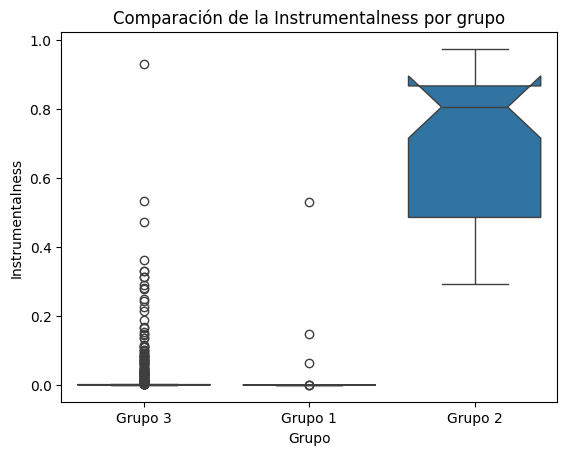

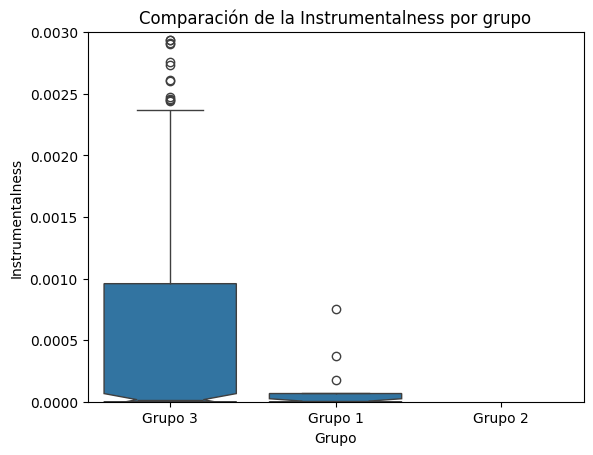

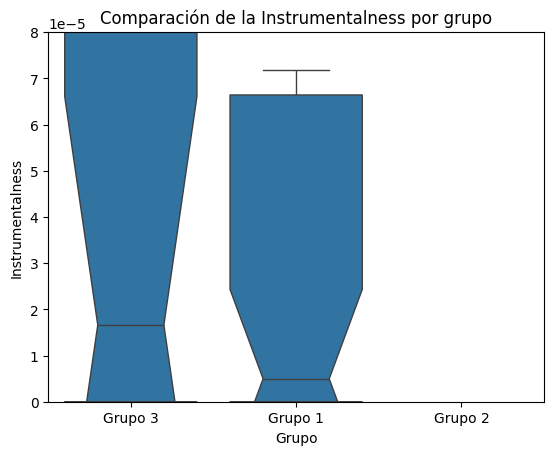

In [245]:
# Crear el boxplot para comparar la Instrumentalness de los grupos
sns.boxplot(x='Grupo', y='Instrumentalness', data=DataSetCopia_conGrupo, notch=True)
plt.title("Comparación de la Instrumentalness por grupo")
plt.ylabel("Instrumentalness")
plt.show()

sns.boxplot(x='Grupo', y='Instrumentalness', data=DataSetCopia_conGrupo, notch=True)
plt.title("Comparación de la Instrumentalness por grupo")
plt.ylabel("Instrumentalness")
plt.ylim([0, 0.003]) # Umbral para ver Instrumentalness del grupo 2 y 3
plt.show()

sns.boxplot(x='Grupo', y='Instrumentalness', data=DataSetCopia_conGrupo, notch=True)
plt.title("Comparación de la Instrumentalness por grupo")
plt.ylabel("Instrumentalness")
plt.ylim([0, 0.00008]) # Umbral para ver Instrumentalness del grupo 1 y 3
plt.show()

Encontramos la diferencia mas significativa en la variable Instrumentalness, imprimimos tres veces el grafico para poder contemplar de cerca los tres box plot.

El grupo 2 se diferencia mucho por la Instrumentalness. El grupo 3 y 1 tienen una gran diferencia entre si tambien.

Más adelante haremos un test de hipótesis para corroborar si estadísticamente esto es cierto.

### Clustering jerarquico
Utilizamos este metodo con el fin de agrupar los datos segun sus similitudes.

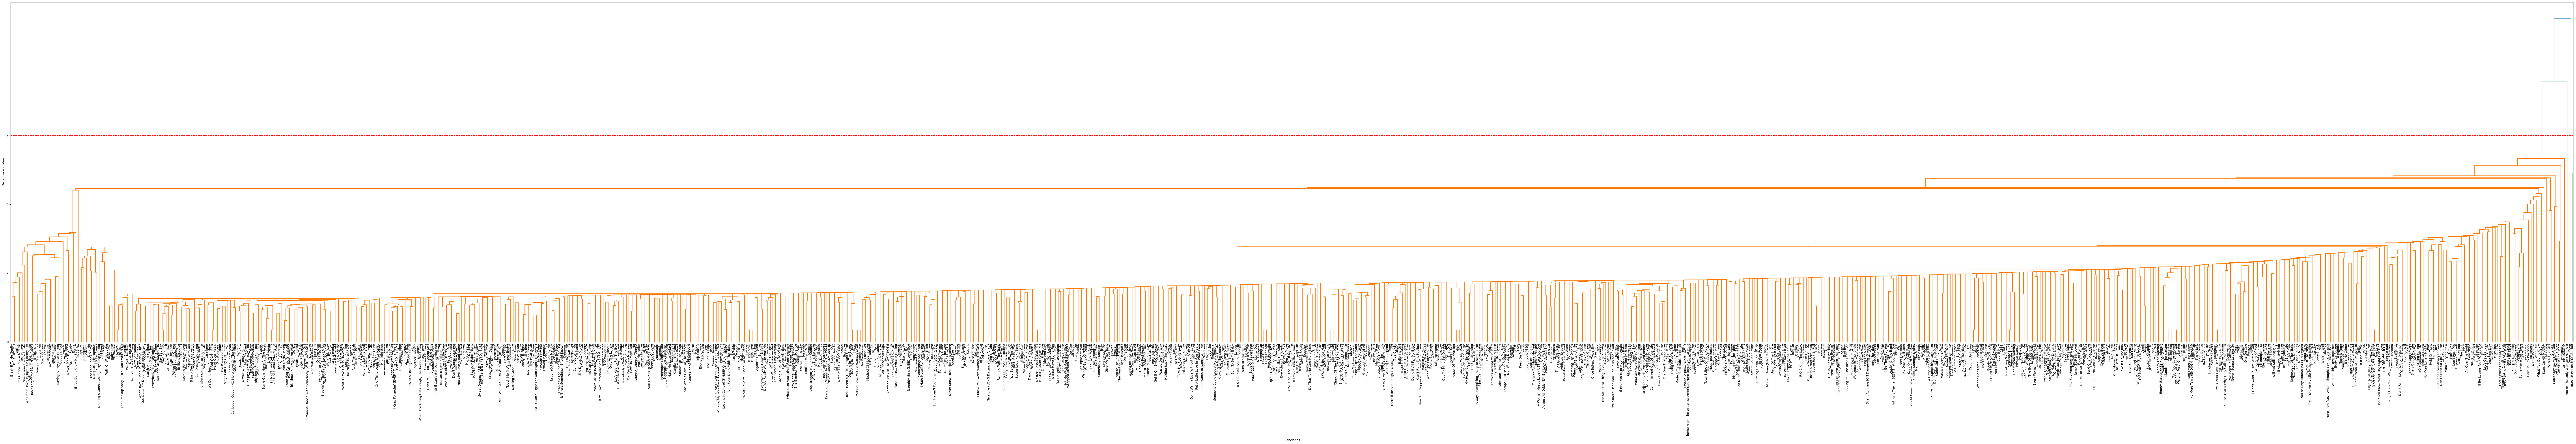

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# generamos el clustering jerárquico
linked = linkage(X_scaled, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(150,20))
dendrogram(linked,
           orientation='top',
           labels=list(Tracks),
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.axhline(y=6, color='r', linestyle='--')  # Línea horizontal para separar grupos
plt.xlabel('Canciones')
plt.ylabel('Distancia euclídea')
plt.show()

Hacemos un corte en la linea horizontal igual a 6

Notamos que se generaron 3 clusters no muy distiguibles entre sí. Tambien parciera existir un outlier en la cancion You're the only woman.

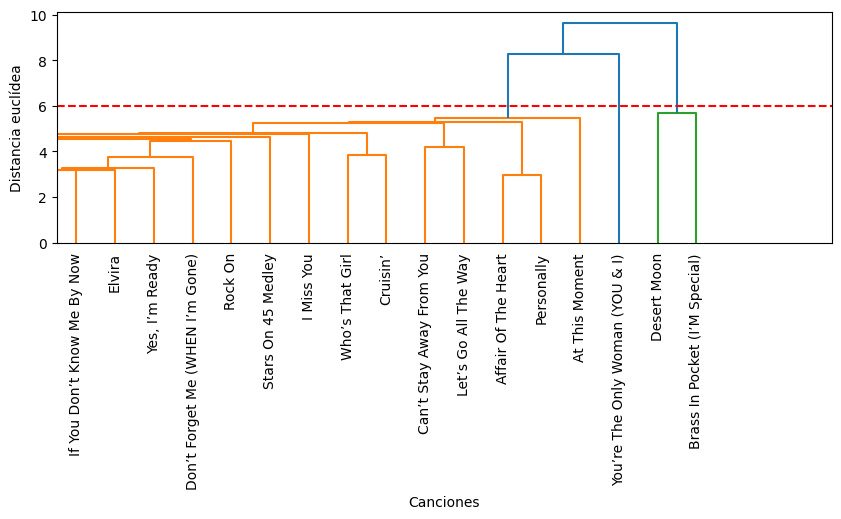

In [ ]:
plt.figure(figsize=(10, 3))  # Tamaño ajustado para visualización cercana
dendrogram(linked,
           orientation='top',
           labels=list(Tracks),
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.axhline(y=6, color='r', linestyle='--')  # Línea horizontal para separar los grupos
plt.xlim(9800, 10000) # Ajustamos la escala para hacer zoom en el corte
plt.xlabel('Canciones')
plt.ylabel('Distancia euclídea')
plt.show()

Aca podemos ver la linea de corte y la division de los 3 grupos. Ahora vamos a crear estos 3 clusters que vemos visualmente.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative = agglomerative.fit_predict(X_scaled)

# imprimimos por pantalla los nombres de las canciones asignados a cada cluster
for k in np.unique(clusters_agglomerative):
  print('Cluster {}'.format(k))
  print(Tracks[clusters_agglomerative==k])
  print('======')

Cluster 0
97     Brass In Pocket (I’M Special)
476                      Desert Moon
Name: Track, dtype: object
Cluster 1
99    You’re The Only Woman (YOU & I)
Name: Track, dtype: object
Cluster 2
0                                       Babe
1                                   The Rose
2                                       Cars
3                                      Magic
4                      We Don’t Talk Anymore
                       ...                  
993                     When I Looked At Him
994                   I Remember Holding You
995                            Don’t Rush Me
996             I’ll Be Loving You (FOREVER)
997    Baby, I Love Your Way/Freebird Medley
Name: Track, Length: 994, dtype: object


Tenemos 3 grupos, uno con 2 filas, otro con 1 y uno con 994 filas.

Este metodo probablemente no sea el mejor para determinar grupos dentro de nuestro DataSet por lo que si tuvieramos que agrupar parecería mejor la opcion de mas arriba con Clusters

### Evaluación de las soluciones

K-means
DB score: 1.8064
Silhouette score: 0.1073
----------
Hierarchical Clustering
DB score: 0.4025
Silhouette score: 0.5729
----------


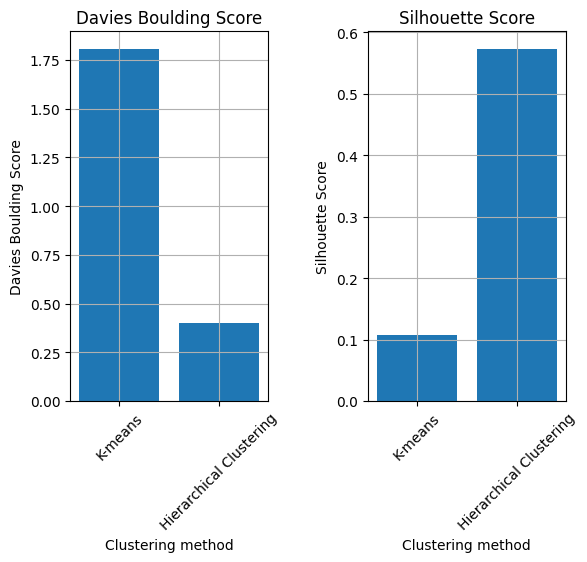

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_kmeans, clusters_agglomerative]
clustering_methods = ['K-means', 'Hierarchical Clustering']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(X_scaled, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(X_scaled, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Boulding Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Boulding Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

plt.show()

Aca podemos ver que las evaluaciones fueron a favor del método de clustering jerárquico, de todas formas, esta evaluación es algo mentirosa, ya que, por ejemplo, el método de Davies Boulding evalúa que tan alejados estan los clusters y que tan densos son (distancias entre los elementos de un mismo cluster) y en el caso del clustering jerarquico que hicimos, teniamos un cluster con un solo elemento y otro con 2 elementos, por lo que la densiadad de estos grupos matemáticamente es muy alta. Pero a fines prácticos el clustering no es muy valioso ya que no pudimos separar mucho a nuestros datos y nos quedó un grupo inmenso con 994 datos.

Por otro lado, el clustering con k-means no fue del todo efectivo, en Davis Boulding dio un numero relativamente alto, pero lejos del 0.

 El coeficiente de silueta si bien dio un numero positivo, esta lejos del uno al que queremos acercarnos.

## Test de Hipótesis

### Hipotesis 1: el grupo 2 se destaca del resto por su instrumentalness.

El test de hipótesis que realizaremos es ver que las canciones del grupo 1 tienen una Instrumentalness mucho mayor que las canciones del grupo 2 y 3. Esto esta sacado de lo hecho anteriormente con los box plot que mostramos.

Volvemos a traer los BoxPlot

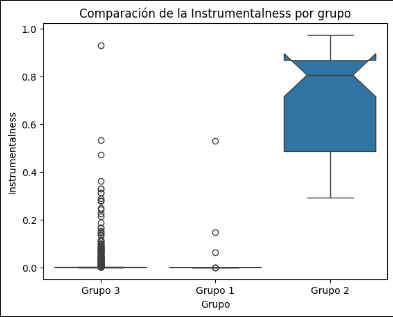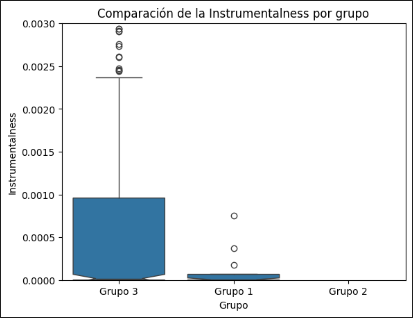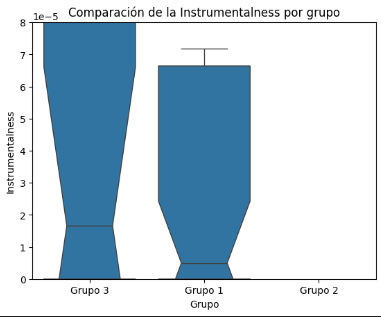

Ahora dividimos los grupos

In [ ]:
from scipy import stats

grupo1Ins = DataSetCopia_conGrupo[DataSetCopia_conGrupo['Grupo'] == 'Grupo 1']['Instrumentalness']
grupo2Ins = DataSetCopia_conGrupo[DataSetCopia_conGrupo['Grupo'] == 'Grupo 2']['Instrumentalness']
grupo3Ins = DataSetCopia_conGrupo[DataSetCopia_conGrupo['Grupo'] == 'Grupo 3']['Instrumentalness']

count    924.000000
mean       0.012137
std        0.054103
min        0.000000
25%        0.000000
50%        0.000017
75%        0.000958
max        0.931000
Name: Instrumentalness, dtype: float64

Vemos si tienen distribucion normal

In [239]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk para Grupo 1
stat, p = shapiro(grupo1Ins)
print(f"Test de Shapiro-Wilk para Grupo 1: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para Grupo 2
stat, p = shapiro(grupo2Ins)
print(f"Test de Shapiro-Wilk para Grupo 2: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para Grupo 3
stat, p = shapiro(grupo3Ins)
print(f"Test de Shapiro-Wilk para Grupo 3: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Grupo 1: Estadístico=0.281, p-valor=0.000
Test de Shapiro-Wilk para Grupo 2: Estadístico=0.876, p-valor=0.000
Test de Shapiro-Wilk para Grupo 3: Estadístico=0.229, p-valor=0.000


No hay normalidad de los datos en ningun grupo. Probamos si son homosedasticos para ver si podemos hacer un test Mann Whitney U

Provamos por levenne a ver si los datos son homsedásticos, si el p-valor es > 0.05, los datos son homosedasticos, caso contrario, no lo son

In [ ]:
# Test de levene para grupos 2 y 1
stat, p = stats.levene(grupo2Ins, grupo1Ins)
print(f"Test de Levene para Instrumentalness de los grupo 2 y 1={stat:.3f}, p-valor={p:.3f}")

# Test de levene para grupos 2 y 3
stat, p = stats.levene(grupo2Ins, grupo3Ins)
print(f"Test de Levene para Instrumentalness de los grupo 2 y 3={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Instrumentalness de los grupo 2 y 1=24.257, p-valor=0.000
Test de Levene para Instrumentalness de los grupo 2 y 3=336.492, p-valor=0.000


Se rechaza la hipotesis nula en ambos casos, por lo tanto los datos no son homosedásticos.

Al no cumplirse los dos supuestos, no hacemos un test t, si no que hacemos un test de Kruskal-Wallis

In [241]:
# Test de Kruskal-Wallis para comparar grupo 2 y grupo 1
stat, p = stats.kruskal(grupo2Ins, grupo1Ins)
print(f"Test de Kruskal-Wallis Instrumentalness: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre la instrumentalness del grupo 2 y del grupo 1.\n")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre la instrumentalness del grupo 2 y del grupo 1.\n")


 # Test de Kruskal-Wallis para comparar grupo 2 y grupo 3
stat, p = stats.kruskal(grupo2Ins, grupo3Ins)
print(f"Test de Kruskal-Wallis para Instrumentalness: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre la instrumentalness del grupo 2 y grupo 3.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre la instrumentalness del grupo 2 y grupo 3.")

Test de Kruskal-Wallis Instrumentalness: Estadístico=49.654, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre la instrumentalness del grupo 2 y del grupo 1.

Test de Kruskal-Wallis para Instrumentalness: Estadístico=128.595, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre la instrumentalness del grupo 2 y grupo 3.


Se rechaza la hipotesis nula para la comparacion con los dos grupos. por lo que podemos decir que hay una instrumentalness muy significativa diferente entre el grupo 2 y 1 y entre el grupo 2 y 3. Además, gracias al gráfico podemos ver que el grupo 2 es el que tiene una Instrumentalness mayor a los otros dos grupos.

### Hipótesis 2: Los 3 grupos tienen canciones con una duracion similar

Esto podriamos decirlo ya que sin importar la caracteristicas generales de una canción, todas suelen durar mas o menos lo mismo. (intuicion pura)

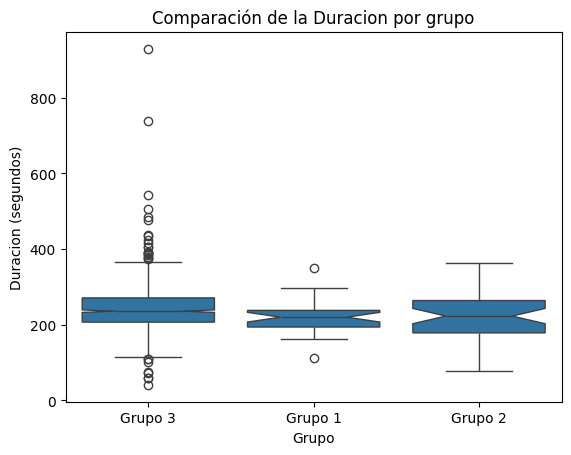

In [246]:
# Crear el boxplot para comparar la Duracion de los grupos
sns.boxplot(x='Grupo', y='Duration_seconds', data=DataSetCopia_conGrupo, notch=True)
plt.title("Comparación de la Duracion por grupo")
plt.xlabel("Grupo")
plt.ylabel("Duracion (segundos)")
plt.show()

Creamos los grupos con la duraciones de las canciones y probamos si tienen distribucion normal.

In [ ]:
# Separacion de los grupos
grupo1Dur = DataSetCopia_conGrupo[DataSetCopia_conGrupo['Grupo'] == 'Grupo 1']['Duration_seconds']
grupo2Dur = DataSetCopia_conGrupo[DataSetCopia_conGrupo['Grupo'] == 'Grupo 2']['Duration_seconds']
grupo3Dur = DataSetCopia_conGrupo[DataSetCopia_conGrupo['Grupo'] == 'Grupo 3']['Duration_seconds']

# Test de Shapiro-Wilk para Grupo 1
stat, p = shapiro(grupo1Dur)
print(f"Test de Shapiro-Wilk para Grupo 1: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para Grupo 2
stat, p = shapiro(grupo2Dur)
print(f"Test de Shapiro-Wilk para Grupo 2: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para Grupo 3
stat, p = shapiro(grupo3Dur)
print(f"Test de Shapiro-Wilk para Grupo 3: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para Grupo 1: Estadístico=0.965, p-valor=0.442
Test de Shapiro-Wilk para Grupo 2: Estadístico=0.983, p-valor=0.735
Test de Shapiro-Wilk para Grupo 3: Estadístico=0.884, p-valor=0.000


El grupo 3 no tiene distribucion normal por lo que lo trataremos mas adelante

El p-valor en los grupos 1 y 2 nos dio mayor a 0,05 por lo que tienen distribucion normal de la duracion en estos grupos

Hacemos un QQ-Plot para ver esta normalidad.

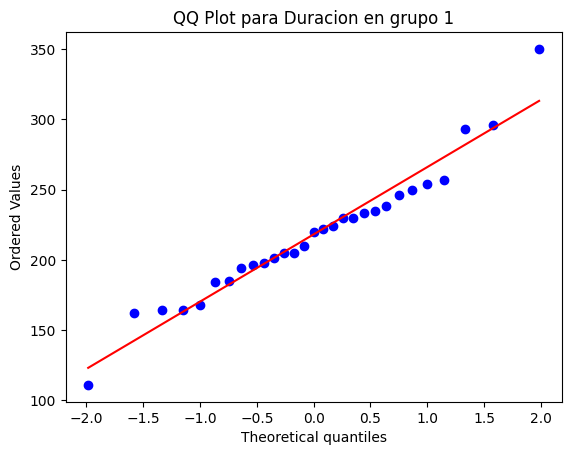

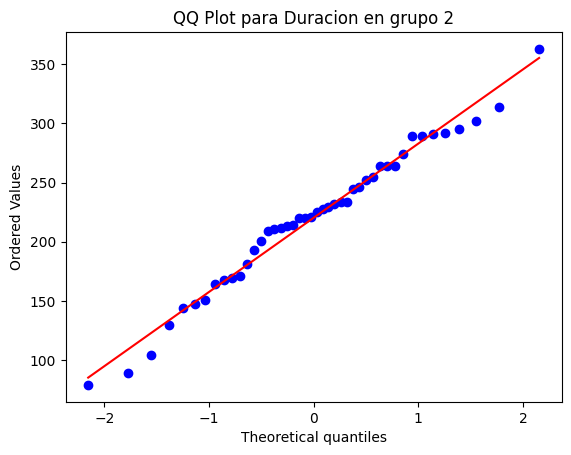

In [256]:
import scipy.stats as stats

# QQ plot para Grupo 1
stats.probplot(grupo1Dur, dist="norm", plot=plt)
plt.title("QQ Plot para Duracion en grupo 1")
plt.show()

# QQ plot para Grupo 2
stats.probplot(grupo2Dur, dist="norm", plot=plt)
plt.title("QQ Plot para Duracion en grupo 2")
plt.show()

Se puede ver una relativa normalidad y como los puntos parecen estar bastante cerca de la recta.

Ahora vamos a ver si estos grupos son homosedasticos.

In [248]:
stat, p = stats.levene(grupo1Dur, grupo2Dur)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}\n")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Los datos son homosedasticos.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Los datos NO son homosedasticos.")

Test de Levene para GDP_per_capita: Estadístico=1.986, p-valor=0.163

No hay suficiente evidencia para rechazar la hipótesis nula.
Los datos son homosedasticos.


El p-valor en este caso dio mayor a 0.05 por lo que podemos decir que los datos son homosedasticos.

Como los grupos 1 y 2 son homosedasticos y cada uno tiene distribucion normal, cumplimos los supuestos para hacer un test t.

Recordemos la hipotesis: La Duracion de las canciones (del grupo 1 y 2 en este caso) son similares

In [ ]:
# Test t para comparar la duracion de las canciones entre el grupo 1 y 2
t_statistic, p = stats.ttest_ind(grupo1Dur, grupo2Dur)
print(f"Test t para Duracion de las canciones: Estadístico={t_statistic:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la duracion de las canciones del grupo 1 y 2.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la duracion de las canciones del grupo 1 y 2.")

Test t para Duracion de las canciones: Estadístico=0.629, p-valor=0.531
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la duracion de las canciones del grupo 1 y 2.


No hay evidencia para rechazar la hipotesis nula por lo que podemos decir que no hay diferencia significativa en la duracion de las canciones del grupo 1 y 2.

Volvemos al grupo 3:

Comprobamos y hay homosedasticidad entre el grupo 3 y el grupo 1 y 2.

In [ ]:
# Test de levene para los grupos 3 y 1
stat, p = stats.levene(grupo3Dur, grupo1Dur)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de levene para los grupos 3 y 1
stat, p = stats.levene(grupo3Dur, grupo2Dur)
print(f"Test de Levene para GDP_per_capita: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para GDP_per_capita: Estadístico=1.208, p-valor=0.272
Test de Levene para GDP_per_capita: Estadístico=0.137, p-valor=0.712


Entre el grupo 3 y el grupo 2 y el grupo 1 y 3 hay homosedasticidad por lo que podriamos hacer el test de Mann Whitney U

In [ ]:
# Test de Mann-Whitney U para comparar grupo 1 y grupo 3
stat, p = stats.mannwhitneyu(grupo1Dur, grupo3Dur)
print(f"Test de Mann-Whitney U para Duracion del grupo 1 y 3: Estadístico={stat:.3f}, p-valor={p:.3f}\n")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre la duracion de las canciones del grupo 1 y grupo 3.\n\n")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre la duracion de las canciones del grupo 1 y grupo 3.\n\n")


# Test de Mann-Whitney U para comparar Duracion de grupo 2 y grupo 3
stat, p = stats.mannwhitneyu(grupo2Dur, grupo3Dur)
print(f"Test de Mann-Whitney U para Duracion del grupo 2 y 3: Estadístico={stat:.3f}, p-valor={p:.3f}\n")

# Interpretación de los resultados
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la duracion de las canciones de los grupos 2 y 3.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la duracion de las canciones de los grupos 2 y 3.")

Test de Kruskal-Wallis para Duracion del grupo 1 y 3: Estadístico=9965.500, p-valor=0.019

Se rechaza la hipótesis nula.
Existe una diferencia significativa entre la duracion de las canciones del grupo 1 y grupo 3.


Test de Mann-Whitney U para Duracion del grupo 2 y 3: Estadístico=17033.000, p-valor=0.069

No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la duracion de las canciones de los grupos 3 y 2.


En el caso de los grupos 1 y 3, Se rechaza la hipótesis nula, ya que elegimos un intervalo de confianza de 0.05. Por lo que podemos decir que la diferencia de duración de ambos grupos es significativa. Si el intervalo de confianza hubiese sido de 0.01 no se hubiera rechazado la hipotesis nula.

El los grupos 2 y 3 no tenemos evidencia suficiente para rechazar la hipótesis nula, y. Por lo tanto no hay diferencia significativa entre la duracion de las canciones del grupo 2 y 3.

#### En Resumen:
Entre el grupo 1 y 2: No hay diferencia significativa.

Entre el grupo 1 y 3: Si hay diferencia significativa.

Entre el grupo 2 y 3: No hay diferencia significativa.

Esto lo podemos relacionar con el boxplot inicial y podemos ver que graficamente el grupo 1 es la "cajita" mas chica y el grupo 3 es la "cajita" más grande, por lo que tiene sentido que haya diferencias significativas entre estos grupos.

## Regresion Lineal

Por el analisis bivariado realizado anteriormente, no parece que la popularidad este fuertemente ligada a algun atributo. 
Vamos a estudiar a fondo si esto es cierto.  Lo que nos interesa en este punto, es estudiar la variable objetivo Popularity analizando la relacion entre los atributos de cada cancion y la popularidad.
Esto podemos hacerlo observando el mapa de calor realizado con anterioridad, pero para hacer foco en la popularidad generamos un nuevo grafico.

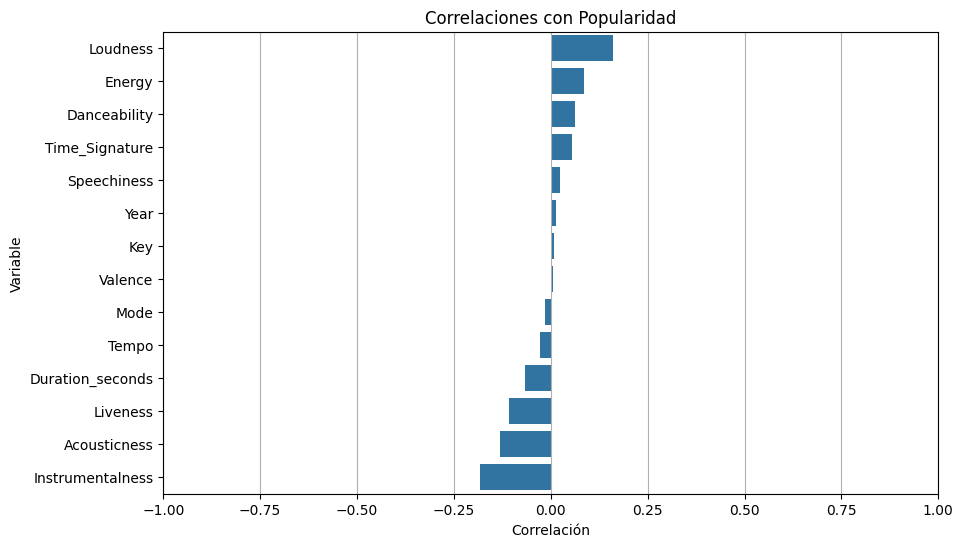

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Selecciona solo las correlaciones con Popularity
popularity_correlations = correlation_matrix['Popularity'].drop('Popularity')

#Ordena las correlaciones de mayor a menor
sorted_correlations = popularity_correlations.sort_values(ascending=False)

#Crea un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones con Popularidad')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.xlim([-1, 1])
plt.show()


Pareciera ser que mientras menos instrumentalness y mas loudness tenga una cancion, mas probabilidad de ser popular tiene. Planteamos regresion lineal para encontrar la mejor recta que explica le relacion entre las variables, es necesario estandarizar los datos antes.

Graficamos instrumentalness y loudness vs Popularity

Text(0.5, 1.0, 'Relacion entre Instrumentalness y Popularity')

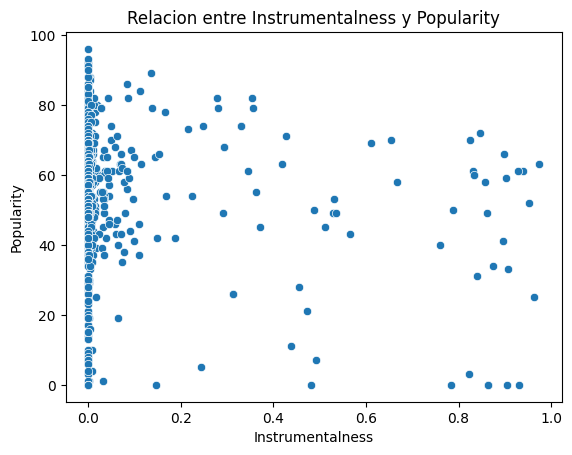

In [261]:
sns.scatterplot(data=DataSetCopia, x="Instrumentalness", y="Popularity")
plt.title("Relacion entre Instrumentalness y Popularity")

El grafico no nos convence, si instrumentalness es la variable mas relacionada con la popularidad (segun el grafico de correlaciones), la relacion entre estas dos variables no nos permite hacer un buen analisis de lo que pasa con la popularidad, esto es porque las muestras se amontonan y no permiten observar con claridad la popularidad, que pareciera variar sin un patron determinado.

### Realizamos regresion lineal simple

In [ ]:
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = DataSetCopia['Instrumentalness']
# y nuestra variable objetivo (variable dependiente)
y = DataSetCopia['Popularity']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     34.79
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           5.03e-09
Time:                        09:38:09   Log-Likelihood:                -4244.9
No. Observations:                 997   AIC:                             8494.
Df Residuals:                     995   BIC:                             8504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               58.6250      0.562  

El porcentaje de varianza explicada (R-squared) es del 3.4%, lo cual es muy bajo. Sin embargo para validar esto tenemos que ver si la distribución de los residuos es normal.

Veo si los residuos tienen una distribucion normal

In [ ]:
_, p = shapiro(model.resid)
print("p = %.4f" % (p))
#comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal (no se rechazó la hipótesis nula)")
else:
    print('No se distribuyen normal (se rechazó la hipótesis nula)')

p = 0.0000
No se distribuyen normal (se rechazó la hipótesis nula)


Se rechaza la hipótesis nula por lo que la distribción de los residuos no es normal, 

Podemos graficar la curva de distribucion normal para verificar visualmente que la distribucion de los residuos no es normal

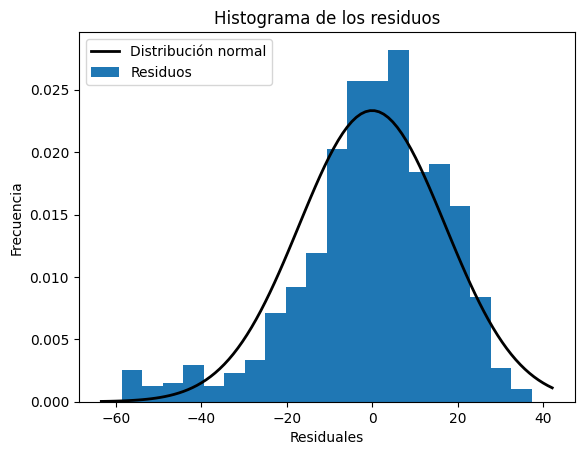

In [ ]:
from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

Se puede ver claramente que la distribucion de los residuos no sigue correctamente la curva de distribucion normal

### Regresion lineal multiple con más variables

Planteamos una nueva hipotesis: Las canciones mas populares, tienden a tener mas loudness y como esta variable tiene alta correlación con energy, podemos usar ambas para aumentar el R-squared. Ahora planteamos regresion lineal con Instrumentalness agregando estas dos columnas para analizar como afectan a la popularidad.

Como encontramos una fuerte relacion entre Loudness y Energy, probamos relacionarlas con la popularidad (a pesar de que la relacion entre energy y popularity es muy debil). 

Text(0.5, 1.0, 'Mediana Popularity\nsegún Energy y loudness')

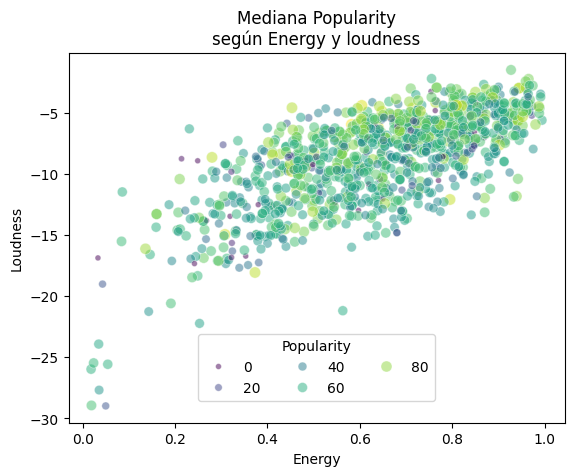

In [262]:
sns.scatterplot(data=DataSetCopia, x="Energy", y="Loudness",
                size="Popularity", hue="Popularity",
                palette="viridis", alpha=0.5)
plt.legend(title="Popularity", loc="center", bbox_to_anchor=(0.5, 0.15), ncol=3)
plt.title("Mediana Popularity\nsegún Energy y loudness")

In [ ]:
#Estandarizamos los datos 

X = DataSetCopia[['Energy', 'Loudness', 'Instrumentalness']]
y = DataSetCopia['Popularity']

scaler = StandardScaler()
Xscaled_RL = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(Xscaled_RL, columns=X.columns)

# DataSet sin estandarizar
print("Medias y desviaciones estándar antes del escalado:")
print(X.describe().loc[['mean', 'std']].round(3).astype(float))

#Chequeo que la estandarizacion funcione (media cerca de 0 y desvio cerca de 1)
print("Medias y desviaciones estándar después del escalado:")
X_scaled_df.describe().loc[['mean', 'std']].round(0).astype(int)


Medias y desviaciones estándar antes del escalado:
      Energy  Loudness  Instrumentalness
mean   0.633    -8.885             0.043
std    0.204     3.832             0.157
Medias y desviaciones estándar después del escalado:


,Energy,Loudness,Instrumentalness
mean,0,0,0
std,1,1,1


In [ ]:
y = y.reset_index(drop=True)
X_scaled_df = X_scaled_df.reset_index(drop=True)

#Ajustamos el modelo de regresion lineal multiple
#Constante ordenada al origen
X_scaled_df = sm.add_constant(X_scaled_df)
#Ajustamos el modelo
model = sm.OLS(y, X_scaled_df).fit()
#Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     17.75
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.16e-11
Time:                        11:42:34   Log-Likelihood:                -4236.0
No. Observations:                 997   AIC:                             8480.
Df Residuals:                     993   BIC:                             8500.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               57.7583      0.538  

La varianza explicada mojoró un poco, ahora tenemos un r cuadrado del 5%. Sigue sin ser un valor muy alto, por lo que no podriamos afirmar que estas tres variables explican como se comporta la popularidad

Para no testear la distribucion normal de los residuos, miramos lo que arroja el sumary en la parte de Prob(Omnibus) y Prob(JB), si estos valores son muy cercanos a 0 podemos saber que los residuos no siguen una distribucion normal.

### Regresión lineal con todas las variables cuantitativas

Ahora vamos a tener en cuenta todas las variables cuantitativas del dataset para ver si podemos mejorar la explicacion de la varianza.

In [ ]:
#Estandarizamos los datos 

X = DataSetCopia.drop('Popularity', axis=1)
X = X.drop(['Track', 'Artist', 'Mode', 'Featuring'], axis=1)
y = DataSetCopia['Popularity']

scaler = StandardScaler()
Xscaled_RL = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(Xscaled_RL, columns=X.columns)

# DataSet sin estandarizar
print("Medias y desviaciones estándar antes del escalado:")
print(X.describe().loc[['mean', 'std']].round(3).astype(float))

#Chequeo que la estandarizacion funcione (media cerca de 0 y desvio cerca de 1)
print("Medias y desviaciones estándar después del escalado:")
X_scaled_df.describe().loc[['mean', 'std']].round(0).astype(int)

Medias y desviaciones estándar antes del escalado:
      Time_Signature  Danceability  Energy    Key  Loudness  Speechiness  \
mean           3.967         0.626   0.633  5.230    -8.885        0.058   
std            0.228         0.152   0.204  3.657     3.832        0.056   

      Acousticness  Instrumentalness  Liveness  Valence    Tempo      Year  \
mean         0.244             0.043     0.179    0.603  120.938  1984.498   
std          0.248             0.157     0.163    0.258   26.246     2.875   

      Duration_seconds  
mean           240.219  
std             63.703  
Medias y desviaciones estándar después del escalado:


,Time_Signature,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Year,Duration_seconds
mean,0,0,0,0,0,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1,1,1,1,1,1


In [143]:
y = y.reset_index(drop=True)
X_scaled_df = X_scaled_df.reset_index(drop=True)

#Ajustamos el modelo de regresion lineal multiple
#Constante ordenada al origen
X_scaled_df = sm.add_constant(X_scaled_df)
#Ajustamos el modelo
model = sm.OLS(y, X_scaled_df).fit()
#Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7.044
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.31e-13
Time:                        11:59:10   Log-Likelihood:                -4217.7
No. Observations:                 997   AIC:                             8463.
Df Residuals:                     983   BIC:                             8532.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               57.7583      0.531  

Mejoramos un poquito mas la explicación de la varianza pero sigue siendo muy insignificante (8.5%) por lo que si sumamos todas las variables, tampoco podriamos explicar a ciencia cierta la popularidad de las canciones.

Al igual que antes chequemos la normalidad de los residuos, vemos nuevamente que los valores no son normales, por lo que no podemos validar el análisis de este modelo

En conclusión no pudimos escribir a la variable popularidad en funcion de ninguna de las otras variables ya que no pudimos verificar la normalidad de los residuos en ninguno de los modelos de regresion lineal que probamos.